In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-8gq8x30v
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-8gq8x30v
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit aac710a35f52bb78ab34d2e52517237941399eff
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4305 sha256=988a8ef0500b466a4754993192172feed6d4acafe9e3458e3f48a59f48e2b508
  Stored in directory: /tmp/pip-ephem-wheel-cache-misfnmbp/wheels/db/c1/1f/a2bb07bbb4a1ce3c43921252aeafaa6205f08637e292496f04
Successfully built NVCCPlugin


In [3]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


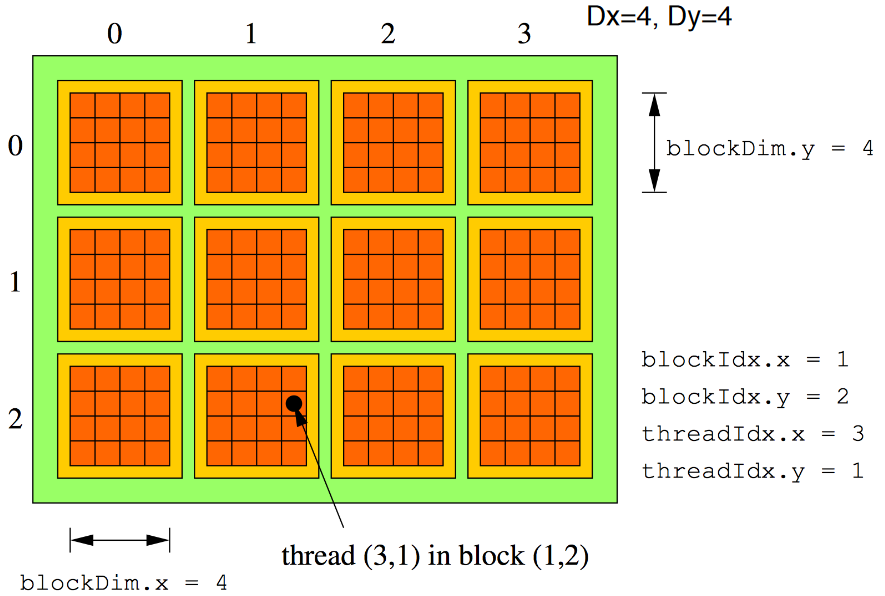

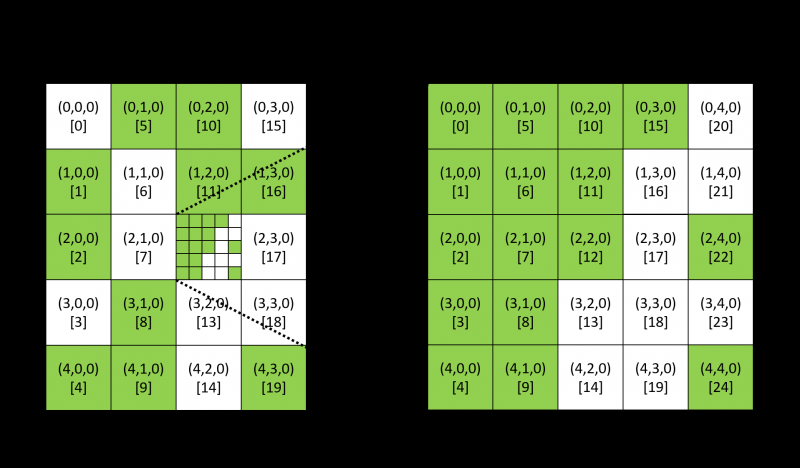

The grid (on the left) has size (5,4,1), that is, it has 5 blocks in the x direction, 4 blocks in the y direction, and 1 block in the z direction.

Each block (on the right) is of size (5,5,1) with 5 threads along the x and y directions, and 1 thread along the z direction. 

In [4]:
%%cuda --name testGoogleColab.cu

#include <cuda_runtime_api.h>
#include <iostream>

__global__ void PrintIDs()
{
    // Use built-in variables blockIdx and threadIdx
    const auto tID = threadIdx;
    const auto bID = blockIdx;
    printf("Block Id: %d,%d - Thread Id: %d,%d\n", bID.x, bID.y, tID.x, tID.y);
}

int main()
{
    std::cout << "==== Sample 03 - Grid Configurations ====\n" << std::endl;
    /*
    Expected output:
    Block IDs and Thread IDs for two separate grids
    */

    std::cout << "Small grid: \n";
    // Configure the grid and block dimensions via built-in struct dim3 (X,Y,Z)
    const dim3 gridSize_small{ 1, 1, 1 }; # This means that the grid consists of a single block with one thread in each dimension.
    const dim3 blockSize_small{ 4, 4, 1 }; # his means that each block consists of 16 threads (4 x 4) in the x and y dimensions and 1 thread in the z dimension.

    // Launch kernel with custom grid
    PrintIDs<<<gridSize_small, blockSize_small>>>();

    // Need to synchronize here to have the GPU and CPU printouts in the correct order
    cudaDeviceSynchronize();

    std::cout << "\nLarger grid: \n";
    const dim3 gridSize_large{ 2, 2, 1 };
    const dim3 blockSize_large{ 16, 16, 1 };
    PrintIDs<<<gridSize_large, blockSize_large >>>();
    cudaDeviceSynchronize();

    return 0;
}


'File written in /content/src/testGoogleColab.cu'

In [5]:
!nvcc -arch=sm_75 -o "/content/src/testGoogleColab.o" /content/src/testGoogleColab.cu

In [6]:
!chmod 755 /content/src/testGoogleColab.o
!/content/src/testGoogleColab.o

==== Sample 03 - Grid Configurations ====

Small grid: 
Block Id: 0,0 - Thread Id: 0,0
Block Id: 0,0 - Thread Id: 1,0
Block Id: 0,0 - Thread Id: 2,0
Block Id: 0,0 - Thread Id: 3,0
Block Id: 0,0 - Thread Id: 0,1
Block Id: 0,0 - Thread Id: 1,1
Block Id: 0,0 - Thread Id: 2,1
Block Id: 0,0 - Thread Id: 3,1
Block Id: 0,0 - Thread Id: 0,2
Block Id: 0,0 - Thread Id: 1,2
Block Id: 0,0 - Thread Id: 2,2
Block Id: 0,0 - Thread Id: 3,2
Block Id: 0,0 - Thread Id: 0,3
Block Id: 0,0 - Thread Id: 1,3
Block Id: 0,0 - Thread Id: 2,3
Block Id: 0,0 - Thread Id: 3,3

Larger grid: 
Block Id: 0,0 - Thread Id: 0,10
Block Id: 0,0 - Thread Id: 1,10
Block Id: 0,0 - Thread Id: 2,10
Block Id: 0,0 - Thread Id: 3,10
Block Id: 0,0 - Thread Id: 4,10
Block Id: 0,0 - Thread Id: 5,10
Block Id: 0,0 - Thread Id: 6,10
Block Id: 0,0 - Thread Id: 7,10
Block Id: 0,0 - Thread Id: 8,10
Block Id: 0,0 - Thread Id: 9,10
Block Id: 0,0 - Thread Id: 10,10
Block Id: 0,0 - Thread Id: 11,10
Block Id: 0,0 - Thread Id: 12,10
Block Id: 0,0 